# Transport network metrics (dis)similarities generalization
Bramka Arga Jafino

Delft University of Technology

Faculty of Technology, Policy and Management

<a id='intro'></a>
## An introduction note

In the previous analysis, metrics (dis)similarities (i.e. the degree of overlap/complementarity) were analyzed for the whole transport network in Bangladesh. Therefore, the conclusion from the (dis)similarities may not hold true if an analysis is conducted for different transport network.

To test the generalizability of the metrics (dis)similarities, the criticality analysis was redone to seven subnetworks comprising of seven divisions in Bangladesh. The results of the criticality metrics from each subnetwork are analyzed by using Spearman-rank correlation coefficient in this notebook.  

The criticality analysis was done for the following subnetworks:
1. <a href='#section_d01'>Barisal division</a>
2. <a href='#section_d02'>Chittagong division</a>
3. <a href='#section_d03'>Dhaka division</a>
4. <a href='#section_d04'>Khulna division</a>
5. <a href='#section_d05'>Rangpur division</a>
6. <a href='#section_d06'>Rajshahi division</a>
7. <a href='#section_d07'>Sylhet division</a>


## 0. Import all required modules and files

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import *
import matplotlib.colors as colors
import seaborn as sns
from __future__ import division

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#Modules developed for this project
from transport_network_modeling import network_visualization as net_v
from transport_network_modeling import criticality as crit

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
sys.version

'2.7.14 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:34:40) [MSC v.1500 64 bit (AMD64)]'

In [3]:
#the criticality results for the subnetworks were stored in pickle format
#the following function is used to load the pickle files
import pickle
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
#record list of metrics in a correct order
all_metric = ['m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

<a id='section_d01'></a>
## D01 Barisal division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [5]:
file_loc = r'./criticality_results/result_BD_BA2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [6]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
barisal_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in barisal_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        barisal_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

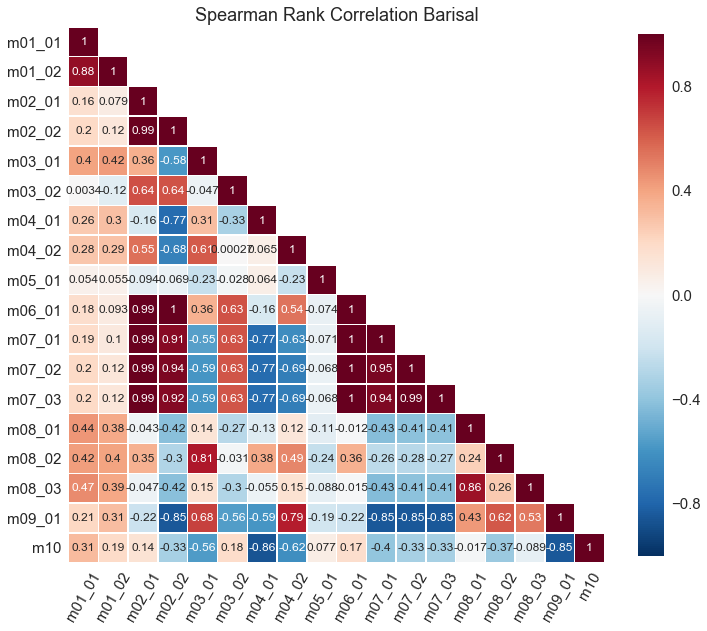

In [24]:
net_v.correlation_plot(barisal_spearmanr_df, title='Spearman Rank Correlation Barisal', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d02'></a>
## D02 Chittagong division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [14]:
file_loc = r'./criticality_results/result_BD_CG2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [18]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
chittagong_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in chittagong_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        chittagong_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

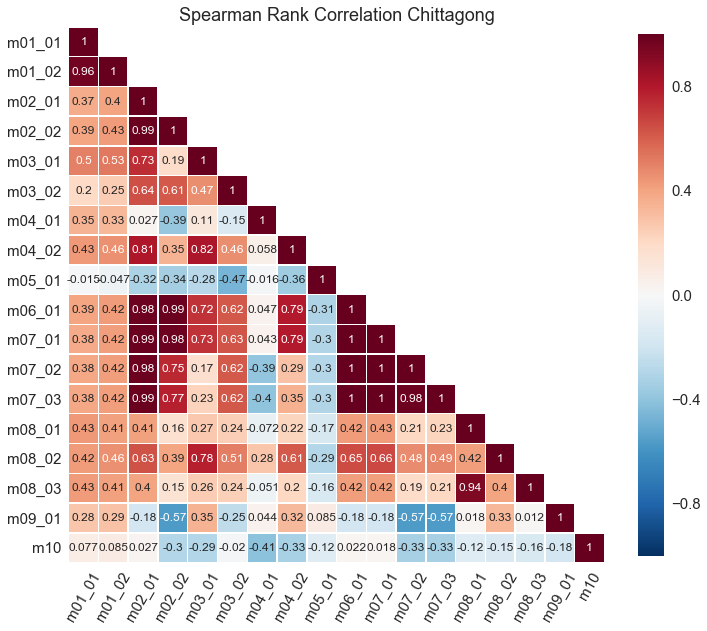

In [25]:
net_v.correlation_plot(chittagong_spearmanr_df, title='Spearman Rank Correlation Chittagong', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d03'></a>
## D03 Dhaka division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [20]:
file_loc = r'./criticality_results/result_BD_DA2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [21]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
dhaka_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in dhaka_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        dhaka_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

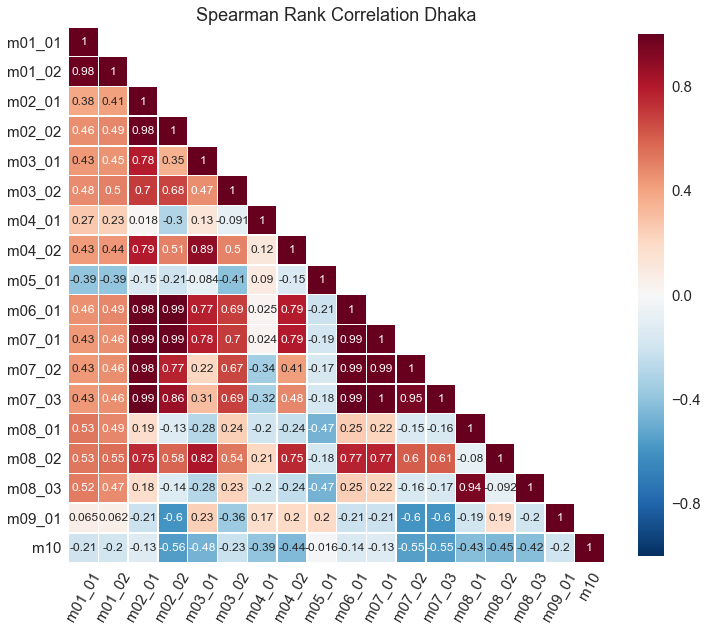

In [26]:
net_v.correlation_plot(dhaka_spearmanr_df, title='Spearman Rank Correlation Dhaka', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d04'></a>
## D04 Khulna division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [27]:
file_loc = r'./criticality_results/result_BD_KH2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [28]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
khulna_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in khulna_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        khulna_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

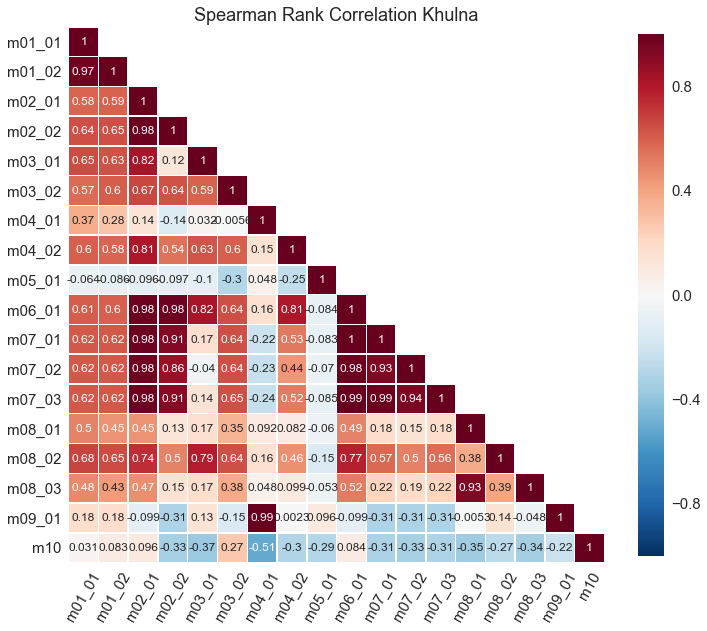

In [29]:
net_v.correlation_plot(khulna_spearmanr_df, title='Spearman Rank Correlation Khulna', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d05'></a>
## D05 Rangpur division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [30]:
file_loc = r'./criticality_results/result_BD_RP2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [31]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
rangpur_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in rangpur_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        rangpur_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

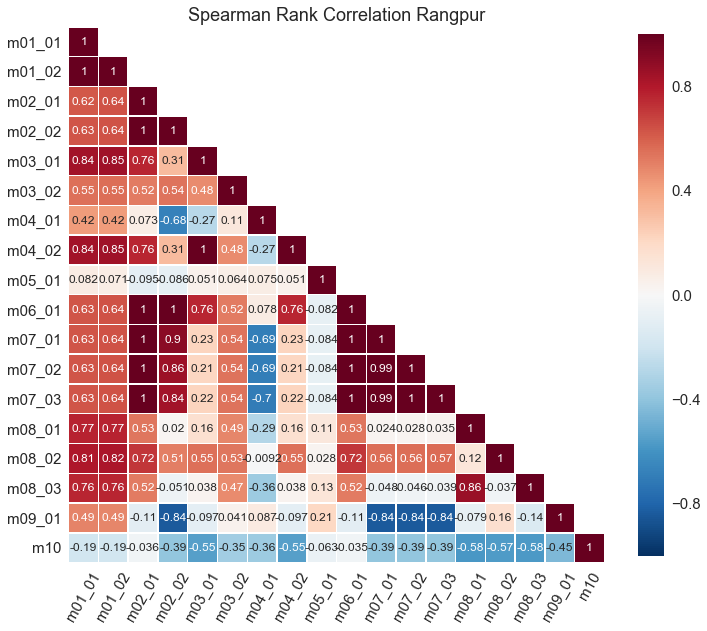

In [32]:
net_v.correlation_plot(rangpur_spearmanr_df, title='Spearman Rank Correlation Rangpur', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d06'></a>
## D06 Rajshahi division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [33]:
file_loc = r'./criticality_results/result_BD_RS2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [35]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
rajshahi_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in rajshahi_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        rajshahi_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

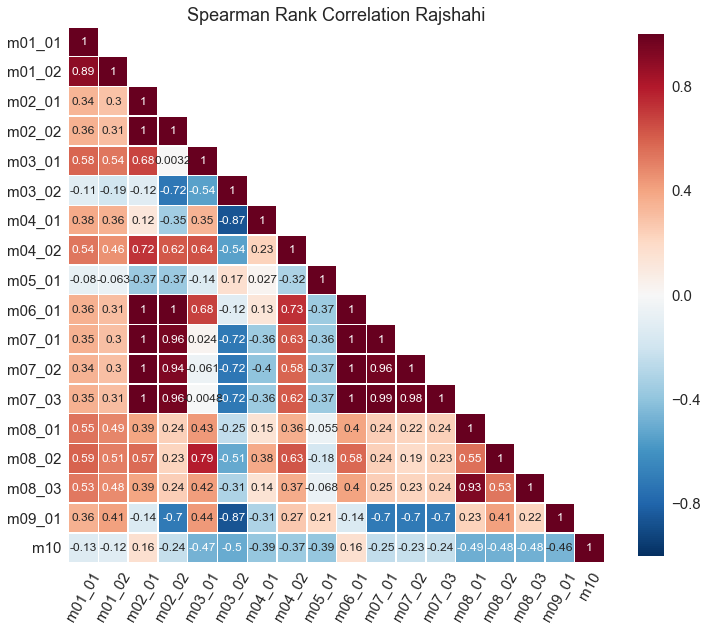

In [36]:
net_v.correlation_plot(rajshahi_spearmanr_df, title='Spearman Rank Correlation Rajshahi', cmap='RdBu_r',
                       vmin=-1, vmax=1)

<a id='section_d07'></a>
## D07 Sylhet division

<a href='#intro'>Back to table of contents</a>

Import criticality results

In [37]:
file_loc = r'./criticality_results/result_BD_SY2'
res_dict = load_obj(file_loc)

crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                     'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
crit_df['osmid'] = crit_df.index
crit_df.index = np.arange(0,len(crit_df),1)

#alter wrong values
crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
             'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
             'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']

Identify metrics with high correlation in general

In [38]:
#record top 100 critical links
n=100
topn_list = []
for metric in all_metric:
    new_data = crit_df2.loc[crit_df2[metric]!=0]
    try:
        topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
    except:
        topn_list.extend(list(new_data.sort_values(metric).osmid))
        
topn_list = list(set(topn_list))
data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

#calculate spearman correlation coefficient
sylhet_spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

for index, rows1 in sylhet_spearmanr_df.iterrows():
    for value, rows2 in rows1.iteritems():
        r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
        sylhet_spearmanr_df.set_value(index, value, r)

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Visualize the correlation coefficient

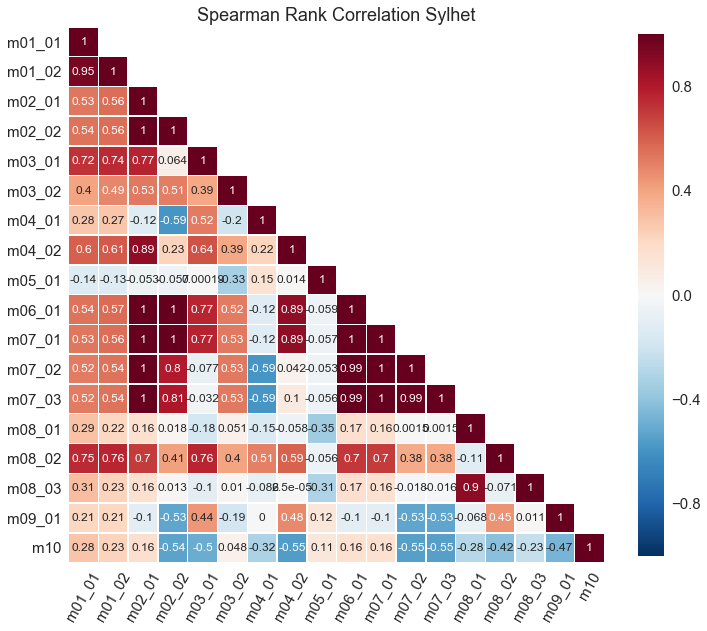

In [39]:
net_v.correlation_plot(sylhet_spearmanr_df, title='Spearman Rank Correlation Sylhet', cmap='RdBu_r',
                       vmin=-1, vmax=1)

In [40]:
def calculate_correlation(file_loc):
    res_dict = load_obj(file_loc)

    crit_df = pd.DataFrame.from_dict(res_dict, orient='index')
    crit_df.columns = ['m3_01', 'm3_02', 'm5_01', 'm8_02', 'm10', 'm1_01', 'm1_02', 
                         'm2_01', 'm2_02','m4_02', 'm6_01', 'm7_01', 'm7_02', 'm7_03', 'm9_01', 'm4_01', 'm8_01', 'm8_03']
    crit_df['osmid'] = crit_df.index
    crit_df.index = np.arange(0,len(crit_df),1)

    #alter wrong values
    crit_df['m2_02'] = crit_df.m2_02.apply(lambda val: 0 if val < 1.39e-10 else val)
    crit_df['m5_01'] = crit_df.m5_01.apply(lambda x: 1/x if x > 0 else 2)

    crit_df2 = crit_df[['osmid','m1_01', 'm1_02', 'm2_01', 'm2_02', 'm3_01', 'm3_02', 'm4_01', 'm4_02', 'm5_01', 'm6_01',
                 'm7_01', 'm7_02', 'm7_03', 'm8_01', 'm8_02', 'm8_03', 'm9_01', 'm10']]
    crit_df2.columns = ['osmid','m01_01', 'm01_02', 'm02_01', 'm02_02', 'm03_01', 'm03_02', 'm04_01', 'm04_02', 'm05_01', 'm06_01',
                 'm07_01', 'm07_02', 'm07_03', 'm08_01', 'm08_02', 'm08_03', 'm09_01', 'm10']
    
    #record top 100 critical links
    n=100
    topn_list = []
    for metric in all_metric:
        new_data = crit_df2.loc[crit_df2[metric]!=0]
        try:
            topn_list.extend(list(new_data.sort_values(metric, ascending=False).osmid[:n]))
        except:
            topn_list.extend(list(new_data.sort_values(metric).osmid))

    topn_list = list(set(topn_list))
    data2 = crit_df2.iloc[:, crit_df2.columns != 'osmid']
    crit_df2 = crit_df2.loc[crit_df2['osmid'].isin(topn_list)]

    #calculate spearman correlation coefficient
    spearmanr_df = pd.DataFrame(np.nan, index=data2.columns, columns=data2.columns)

    for index, rows1 in spearmanr_df.iterrows():
        for value, rows2 in rows1.iteritems():
            r, p, n = crit.correlate_metric_spearman(df=crit_df2, m_a=index, m_b=value)
            spearmanr_df.set_value(index, value, r)
            
    return spearmanr_df